In [138]:

#import bokeh as bk

import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
#from mpl_toolkits.basemap import Basemap
#import geopandas as gpd

# import requests
# import descartes
%matplotlib inline

import seaborn as sns

In [139]:
stats = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape')

In [140]:
# I saved .xsls file to csv first. It caused an encoding issue, however 'unicode_escape' fixed the problem. While I import the database, I parsed dates for the further steps.
stats = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', parse_dates=['Date', 'Date Entered/Updated'])
stats.head(1)

,F1,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s)
0,1,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...


In [141]:
# Checking the types of longigute and latitue : the result is object. 
print(stats['Facility Latitude'].dtype)
print(stats['Facility Longitude'].dtype)

object
object


In [142]:
# Therefore, I changed Lat/Lon values to float. In order to do so, I had to replace 'Unknown' values to None.
stats['Facility Latitude'] = stats['Facility Latitude'].replace('Unknown', None)
stats['Facility Longitude'] = stats['Facility Longitude'].replace('Unknown', None)

stats['Facility Latitude'] = stats['Facility Latitude'].astype(float)
stats['Facility Longitude'] = stats['Facility Longitude'].astype(float)

print(stats['Facility Latitude'].dtype)
print(stats['Facility Longitude'].dtype)

float64
float64


In [143]:
# Now, I need to make a new column, which measures the frequencies of testing by facility names.
# First, I counted values by 'Facility Name' columm. The total number of missile testing is 245.
facility_frequencies = stats['Facility Name'].value_counts()
facility_frequencies.sum()

245

In [144]:
#Now, I'm adding a new column called 'Frequencies' by using .map function. Now the 'Frequencies' column appears.
stats['Frequencies'] = stats['Facility Name'].map(facility_frequencies)
stats.head(1)

,F1,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s),Frequencies
0,1,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...,17


In [145]:
#success_count = len(stats[(stats.groupby('Facility Name')) & (stats['Test Outcome'] == 'Success')])
#success_count = stats[stats['Test Outcome'] == 'Success'].groupby('Facility Name').size()

# Finding the success count by facilities. 'Test Outcome' options are Success & Failure.
# success_count_by_facilities = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())
# success_count_by_facilities.head(1)

In [146]:
# Delete maybe

# Testing the success count. Example used = Hodo Peninsula
# success_count = len(stats[(stats['Facility Name'] == 'Hodo Peninsula') & (stats['Test Outcome'] == 'Success')])
# success_count

In [147]:
stats['Year'] = pd.to_datetime(stats['Date']).dt.year

In [148]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [149]:
import matplotlib.pyplot as plt 
import seaborn as sns

stats = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape')
stats['Year'] = pd.to_datetime(stats['Date']).dt.year

stats_year = stats['Year']

yearly_frequencies = stats['Year'].value_counts().sort_index()

yearly_frequencies = yearly_frequencies.sort_index()
x = yearly_frequencies.index
y = yearly_frequencies.values

#plt.barplot(x='species', y='sepal_length', data='stats_year')
#plt.text(1, 1, 'HI', fontsize = 10)
# plt.text(1, 1, 'Parabola $Y = x^2$', fontsize = 10)
  
# plt.plot(x, y, c='g')
  
# plt.xlabel("X-axis", fontsize = 15)
# plt.ylabel("Y-axis",fontsize = 15)

# #(figsize=(15,15))
# #ax.text(3,3, "hi")

# plt.show()

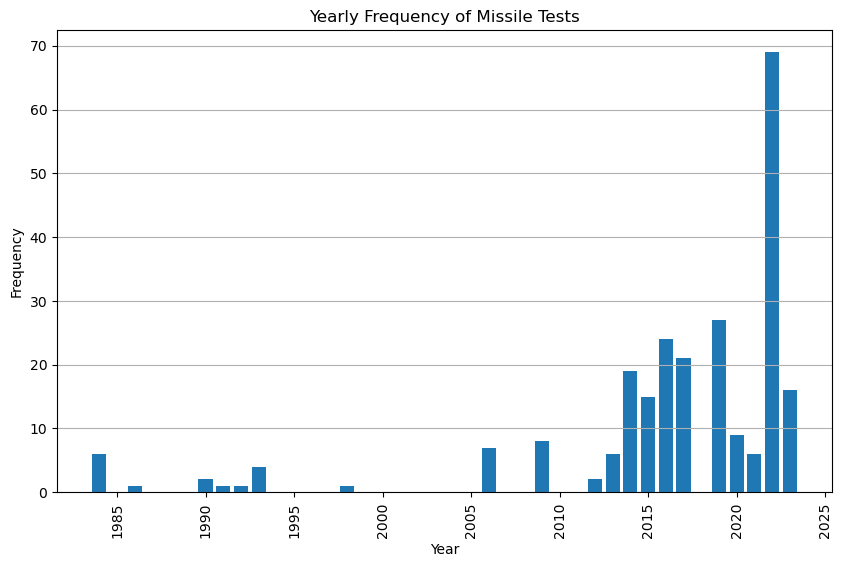

In [150]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(x, y)

# Adding labels and titles
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency of Missile Tests')

# Adding gridlines
plt.grid(True, axis='y')

# Rotating x-axis labels if needed
plt.xticks(rotation=90)

# Displaying the chart
plt.show()

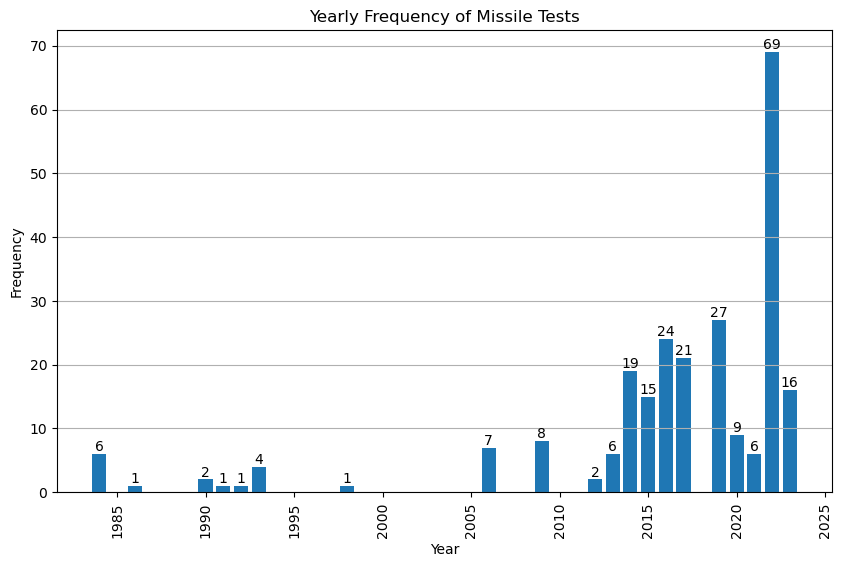

In [151]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(x, y)

# Adding labels and titles
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency of Missile Tests')

# Adding gridlines
plt.grid(True, axis='y')

# Rotating x-axis labels if needed
plt.xticks(rotation=90)

# Adding text inside the chart
for i, freq in enumerate(y):
    plt.text(x[i], freq, str(freq), ha='center', va='bottom')

# Displaying the chart
plt.show()

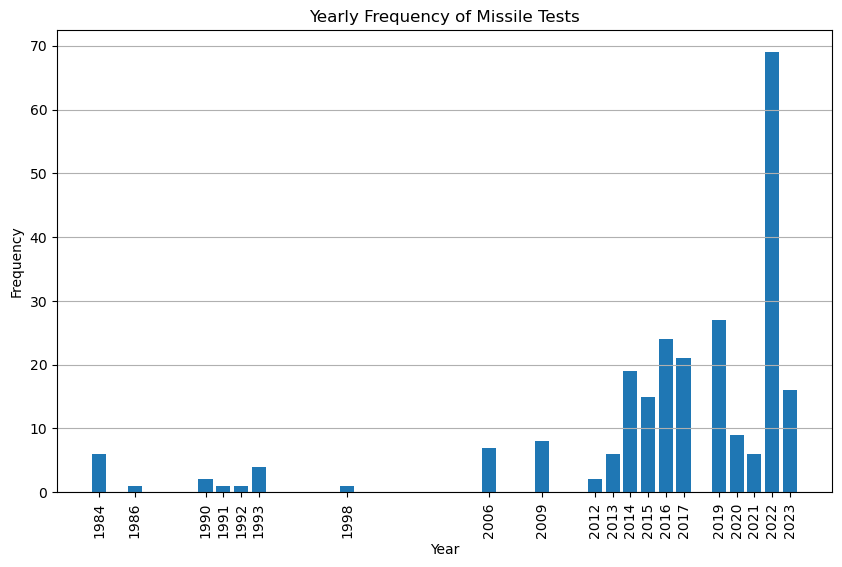

In [152]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(x, y)

# Adding labels and titles
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency of Missile Tests')

# Adding gridlines
plt.grid(True, axis='y')

# Rotating x-axis labels if needed
plt.xticks(rotation=90)

# Updating x-axis tick labels
plt.xticks(x)

# Displaying the chart
plt.show()

In [153]:
print(yearly_frequencies)

1984     6
1986     1
1990     2
1991     1
1992     1
1993     4
1998     1
2006     7
2009     8
2012     2
2013     6
2014    19
2015    15
2016    24
2017    21
2019    27
2020     9
2021     6
2022    69
2023    16
Name: Year, dtype: int64


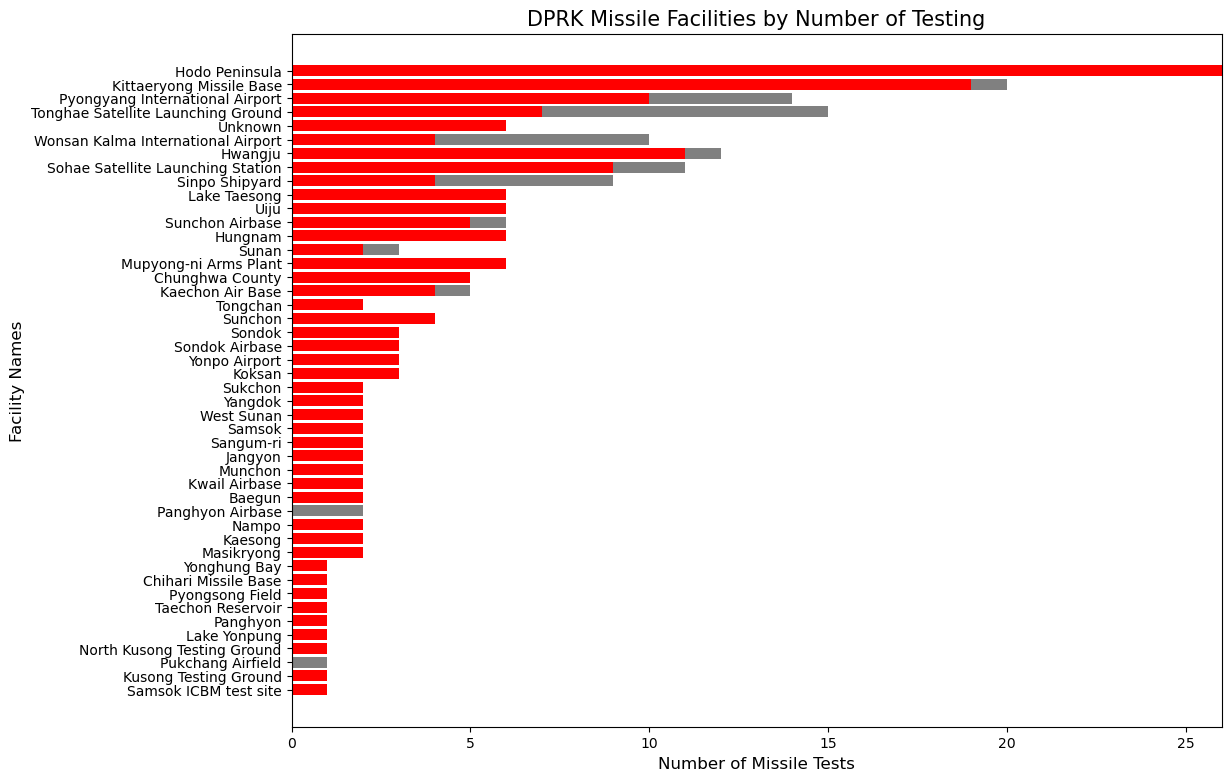

In [154]:
# I already counted the success by facilities from the previous code.
# which is the following code: stats['Frequencies'] = stats['Facility Name'].map(facility_frequencies)

# Now, I need to count the success and failure by facilities.
facility_success = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())
facility_failure = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Failure').sum())

# Determine the figure size
plt.figure(figsize=(12, 9))


# I used [::-1] because otherwise, the highest number goes to the bottom.
facility_names_reversed = facility_frequencies.index[::-1]
facility_counts_reversed = facility_frequencies.values[::-1]

success_color = 'red'  # Color for success
failure_color = 'grey'  # Color for failure

success_counts = facility_success.reindex(facility_names_reversed).values
failure_counts = facility_failure.reindex(facility_names_reversed).values

bar_positions = np.arange(len(facility_names_reversed))

plt.barh(bar_positions, success_counts, color=success_color)
plt.barh(bar_positions, failure_counts, left=success_counts, color=failure_color)

plt.yticks(bar_positions, facility_names_reversed)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Number of Missile Tests', size=12)
plt.ylabel('Facility Names', size=12)
plt.title('DPRK Missile Facilities by Number of Testing', size=15)
plt.xticks(rotation=0)

legend_font_size = 16
#plt.legend(['Success', 'Failure', "Max = 26"], loc='center', prop={'size': legend_font_size})

# success_patch = plt.barh([], [], color=success_color)[0]
# failure_patch = plt.barh([], [], color=failure_color)[0]
# plt.legend([success_patch, failure_patch, "Max = 26"], ['Success', 'Failure'], loc='lower right', prop={'size': legend_font_size})

# Add the "Max = 26" label inside the legend box
#plt.text(0.5, -0.2, "Max = 26", transform=plt.gca().transAxes, ha='center', va='center', fontsize=legend_font_size)
#plt.text('Max = 26', ha='center', va='center', fontsize=legend_font_size)



#plt.tight_layout()
plt.show()

In [155]:
# I'm adding a new column called 'Year' to sort by year. For the graph, sorting by year makes more concise depiction.
stats['Year'] = pd.to_datetime(stats['Date']).dt.year
stats.head(1)

,F1,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s),Year
0,1,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...,1984


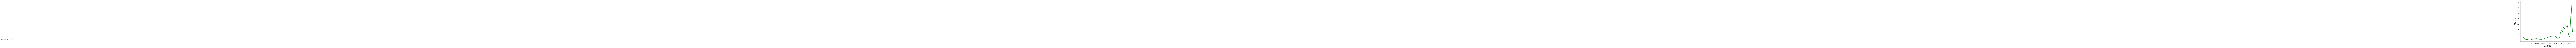

In [156]:
stats = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape')

#Count by years
#yearly_frequencies = stats['Year'].value_counts().sort_index()
#yearly_frequencies = yearly_frequencies.sort_index()
x = yearly_frequencies.index
y = yearly_frequencies.values

plt.plot(x, y)

plt.text(1, 1, 'Parabola $Y = x^2$', fontsize = 10)
  
plt.plot(x, y, c='g')
  
plt.xlabel("X-axis", fontsize = 15)
plt.ylabel("Y-axis",fontsize = 15)

#(figsize=(15,15))
#ax.text(3,3, "hi")

plt.show()

In [157]:
#Count by years
yearly_frequencies = stats['Year'].value_counts().sort_index()
#yearly_frequencies = yearly_frequencies.sort_index()

plt.figure(figsize=(10, 7))
plt.plot(yearly_frequencies.index, yearly_frequencies.values, marker='o', color="red")
plt.tick_params(axis='x', labelsize=10)

plt.xlabel('Year', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Missile testing count by year', size = 20)

#plt.text(2, 4, 'Kim, Il-sung', fontsize=5, color='gray')

#plt.scatter(1987, marker='*', color='orange', s=10, label='1987 Stock Market Crash')
plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

#plt.scatter(1987, self_inflicted_deaths.loc[df['Calendar Year'] == 1987].values[0], marker='*', color='orange', s=200, label='1987 Stock Market Crash')

#plt.tight_layout()
plt.show()

KeyError: 'Year'

In [ ]:
all_years = pd.Series(range(yearly_frequencies.index.min(), yearly_frequencies.index.max() + 1))

In [ ]:
average = yearly_frequencies.mean()
q1 = yearly_frequencies.quantile(0.25)
q3 = yearly_frequencies.quantile(0.75)

print(average, q1, q3)

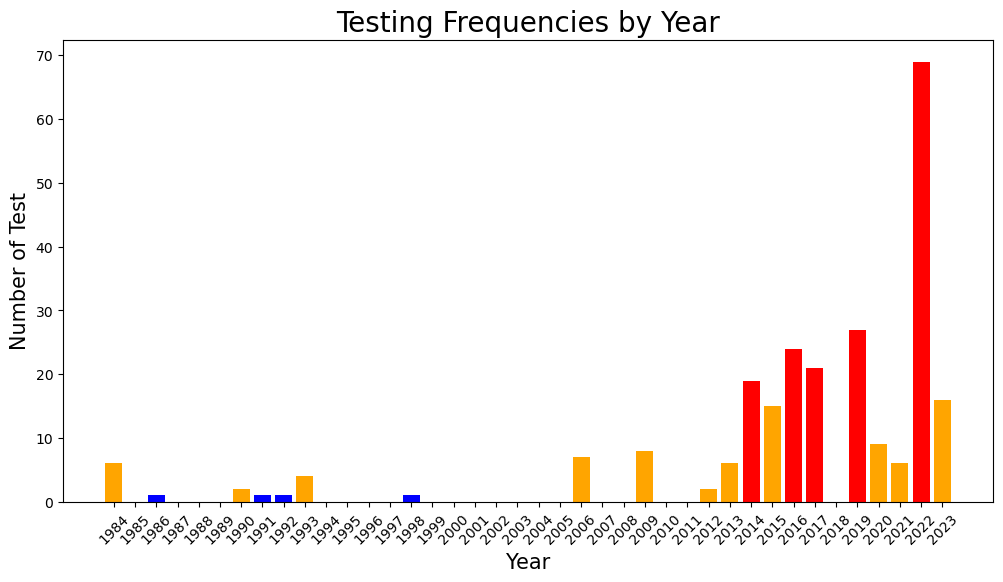

In [ ]:
stats['Year'] = pd.to_datetime(stats['Date']).dt.year

yearly_frequencies = stats['Year'].value_counts().sort_index()

all_years = pd.Series(range(yearly_frequencies.index.min(), yearly_frequencies.index.max() + 1))
#yearly_frequencies = yearly_frequencies.reindex(all_years).fillna(0)

average = yearly_frequencies.mean()
q1 = yearly_frequencies.quantile(0.25)
q3 = yearly_frequencies.quantile(0.75)

color_q1 = 'blue'  # Color for below 1st quartile
color_mean = 'orange'  # Color for between 1st quartile and 3rd quartile
color_q3 = 'red'  # Color for above 3rd quartile

bar_colors = []
for freq in yearly_frequencies.values:
    if freq < q1:
        bar_colors.append(color_q1)
    elif freq > q3:
        bar_colors.append(color_q3)
    else:
        bar_colors.append(color_mean)

plt.figure(figsize=(12, 6))
plt.bar(yearly_frequencies.index, yearly_frequencies.values, color=bar_colors)

plt.tick_params(axis='x', labelsize=10)
plt.xticks(all_years, rotation = 45)

plt.xlabel('Year', size=15)
plt.ylabel('Number of Test', size=15)
plt.title('Testing Frequencies by Year', size=20)


# plt.text(1, 4, 'Kim, Il-sung', fontsize=5, color='gray')
# plt.text(3, 4, 'Kim, Jong-il', fontsize=5, color='gray')
# plt.text(5, 4, 'Kim, Jong-un', fontsize=5, color='gray')

#plt.tight_layout()
plt.show()


In [ ]:
stats['Frequencies'] = stats['Facility Name'].map(facility_frequencies)


map_fig2 = px.scatter_mapbox(stats, lat = 'Facility Latitude', lon = 'Facility Longitude', 
                             color = stats['Facility Name'],
                             size = 'Frequencies',  # Column containing frequencies
                             zoom = 6,
                             center={'lat': 39.17180415583127, 'lon': 126.551952046587},
                             width = 1200,
                             height = 800,
                             title = 'DPRK Nuclear Facility Locations')

map_fig2.update_layout(mapbox_style="carto-positron", title_font_size=25, title_font_family="Arial")
#map_fig2.update_layout(margin={"r":10, "t":50, "l":0, "b":10})
map_fig2.update_layout(margin_autoexpand=True)